# Task 4.10 Part 1

## Content of Workbook:
## Step 2: Dealing with Security Implications and PII Data
## Step 3: Creating a Region Column and Examining Regional Spending Habits
## Step 4: Create Exclusions Flag for Low-Activity Customers
## Step 5: Create Profiling Variable Based on age, income, department_id, number of dependents
## Step 6: Visualise Profile Distributions
## Step 7: Aggregating Max, Min, and Mean Variavbles on Customer Profile Level
## Step 8: Compare Customer Profiles Accross Regions and Departments
## Step 9: Visualise Results of Customer Profile Comparison

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Import dataframe
path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\Data Immersion\Achievement 4\01-2025 Instacart Basket Analysis'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl')
df = pd.read_pickle(file_path)

### Step 2: Dealing with Security Implications and PII Data

In [10]:
# Look up all variable names
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'num_dependents', 'family_status', 'annual_income',
       'years_as_customer', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order_flag',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'product_spending_flag', 'avg_order_spending',
       'order_spending_flag', 'median_days_since_prior_order',
       'order_freq_flag'],
      dtype='object')

#### Potential PII Data
#### Highly Sensitive: first_name, last_name, annual_income
#### Potentially Sensitive: age, num_dependents, family_status

#### Note: In the exercise, it says that "you’ll be told how to react if you receive data that contains PII elements", so I am not exactly sure how to deal with this data. The exercise mentions potentially deleting PII data, is that necessary here? ####

### Step 3: Creating a Region Column and Examining Regional Spending Habits

In [14]:
# Define mapping for regions
region_map = {
    # Region 1: Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Region 2: Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # Region 3: South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',

    # Region 4: West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West',
    'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West',
    'Arizona': 'West', 'New Mexico': 'West', 'Alaska': 'West',
    'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}


In [15]:
# Apply the mapping to create the "Region" column
df['Region'] = df['state'].map(region_map)

# Check if there are any unmatched states (potential misspellings)
missing_states = df[df['Region'].isna()]['state'].unique()
print("States Not Mapped to Any Region:", missing_states)


States Not Mapped to Any Region: [], Categories (51, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [16]:
# Check first few rows
print(df[['state', 'Region']].head())

      state   Region
0  Missouri  Midwest
1  Missouri  Midwest
2  Missouri  Midwest
3  Missouri  Midwest
4  Missouri  Midwest


In [17]:
# Count of customers per region
print("Customer Distribution by Region:", df['Region'].value_counts())

Customer Distribution by Region: Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64


#### The above function does not show the true customer count per state as it treats each row as an individual customer when multiple rows belong to individual customers.

In [19]:
# Standardise state names before mapping
df['state'] = df['state'].str.strip()  # Remove leading/trailing spaces
df['state'] = df['state'].str.title()  # Ensure proper capitalization

# Apply the mapping again
df['Region'] = df['state'].map(region_map)

In [20]:
# Check for unmatched states again
missing_states = df[df['Region'].isna()]['state'].unique()
print("States Not Mapped to Any Region (After Fix):", missing_states)

States Not Mapped to Any Region (After Fix): ['District Of Columbia']


In [21]:
# Standardise "District Of Columbia" to "District of Columbia"
df['state'] = df['state'].replace("District Of Columbia", "District of Columbia")

# Apply the mapping again
df['Region'] = df['state'].map(region_map)

In [22]:
# Check for unmatched states again
missing_states = df[df['Region'].isna()]['state'].unique()
print("States Not Mapped to Any Region (After Second Fix):", missing_states)

States Not Mapped to Any Region (After Second Fix): []


In [23]:
# Count unique customers per region
customer_counts = df.groupby('Region')['user_id'].nunique()

# Print results
print("Unique Customer Count by Region", customer_counts)

Unique Customer Count by Region Region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64


In [24]:
# Sum unique customers by region
48519 + 36388 + 68737 + 52565

206209

In [25]:
# Verify number of unique customers
df['user_id'].value_counts()

user_id
201268    3704
129928    3637
164055    3061
186704    2936
176478    2921
          ... 
179100       3
51229        3
203875       2
124615       2
91567        1
Name: count, Length: 206209, dtype: int64

In [26]:
# Difference in spending habits between regions using crosstabs
crosstab = pd.crosstab(df['Region'], df['product_spending_flag'], dropna = False)

In [27]:
# Check results
crosstab

product_spending_flag  High product spender  Low product spender
Region                                                          
Midwest                              155975              7441350
Northeast                            108225              5614511
South                                209691             10582194
West                                 160354              8132559

In [28]:
# Create crosstab using only unique users (without changing main dataframe)
crosstab = pd.crosstab(df.drop_duplicates(subset=['user_id'])['Region'], 
                        df.drop_duplicates(subset=['user_id'])['product_spending_flag'], 
                        dropna=False)

# Check results
crosstab

product_spending_flag  High product spender  Low product spender
Region                                                          
Midwest                                1263                47256
Northeast                               883                35505
South                                  1817                66920
West                                   1394                51171

#### It seems that spending habits mimic customer sizes of each region

In [30]:
# Normalise by dividing each region's count by the total unique customers in that region
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Check the normalised spending habits per region
crosstab_percentage

product_spending_flag  High product spender  Low product spender
Region                                                          
Midwest                            2.603104            97.396896
Northeast                          2.426624            97.573376
South                              2.643409            97.356591
West                               2.651955            97.348045

#### Based on the normalised spending habits it seems that the percentage of high product spenders and low product spenders in each region is almost indetical

### Step 4: Create Exclusions Flag for Low-Activity Customers

In [33]:
# Create a new column with the total number of orders per user
df['total_orders'] = df.groupby('user_id')['order_number'].transform('max')

In [34]:
# Use loc function to create an exclusion flag for low-activity customers
df.loc[df['total_orders'] < 5, 'exclusion_flag'] = 'Low-activity customer'
df.loc[df['total_orders'] >= 5, 'exclusion_flag'] = 'Active customer'

In [35]:
# Check distribution of flagged customers
df['exclusion_flag'].value_counts()

exclusion_flag
Active customer          30964564
Low-activity customer     1440295
Name: count, dtype: int64

In [36]:
# Drop duplicate user_id entries to ensure each user is counted only once
unique_user_counts = df.drop_duplicates(subset=['user_id'])['exclusion_flag'].value_counts()

# Check results
print("Unique Customer Count by Exclusion Flag", unique_user_counts)

Unique Customer Count by Exclusion Flag exclusion_flag
Active customer          162631
Low-activity customer     43578
Name: count, dtype: int64


In [37]:
# Keep only active customers
df_active = df.loc[df['exclusion_flag'] == 'Active customer']

In [38]:
# Verify that only active customers remain
print("Customers After Filtering:", df_active['user_id'].nunique())

Customers After Filtering: 162631


### Step 5: Create Profiling Variable Based on age, income, department_id, number of dependents

In [40]:
# Default value for all customers
df_active['customer_profile'] = 'Other'  

# Young Parents: Age < 35, has dependents, buys baby products (department_id: 18)
df_active.loc[(df_active['age'] < 35) & (df_active['num_dependents'] > 0) & (df_active['department_id'] == 18), 'customer_profile'] = 'Young Parent'

# Senior Shoppers: Age > 60, buys health-related products (department_id 11: personal care)
df_active.loc[(df_active['age'] > 60) & (df_active['department_id'] == 11), 'customer_profile'] = 'Senior Shopper'

# Wealthy Shoppers: High income (> 120,000)
df_active.loc[(df_active['annual_income'] > 120000), 'customer_profile'] = 'Wealthy Shopper'

# Budget Shoppers: Low income (< 40,000)
df_active.loc[(df_active['annual_income'] < 40000), 'customer_profile'] = 'Budget Shopper'

# Single Adults: Age 25-40, no dependents
df_active.loc[(df_active['age'].between(25, 40)) & (df_active['num_dependents'] == 0), 'customer_profile'] = 'Single Adult'

# Young Adult: Age 18-24
df_active.loc[(df_active['age'].between(18, 24)), 'customer_profile'] = 'Young Adult'

# Working Professionals: Age 30-55, moderate to high income, shops between 5-8 AM or 6-8 PM on weekdays (Monday-Friday)
df_active.loc[(df_active['age'].between(30, 55)) & 
       (df_active['annual_income'] > 60000) & 
       (df_active['orders_day_of_week'].between(2, 6)) & 
       ((df_active['order_hour_of_day'].between(5, 8)) | (df_active['order_hour_of_day'].between(18, 20))),
       'customer_profile'] = 'Working Professional'

# Family Shoppers: 2+ dependents
df_active.loc[(df_active['num_dependents'] > 1), 'customer_profile'] = 'Family Shopper'


C:\Users\daxma\AppData\Local\Temp\ipykernel_3232\637551064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['customer_profile'] = 'Other'


In [41]:
# Check customer profile distribution
print("Customer Profile Distribution:", df_active['customer_profile'].value_counts())

Customer Profile Distribution: customer_profile
Family Shopper          15505777
Other                    6322007
Wealthy Shopper          4304567
Single Adult             1830863
Young Adult              1707595
Working Professional      706413
Budget Shopper            540696
Senior Shopper             33894
Young Parent               12752
Name: count, dtype: int64


### Step 6: Visualise Profile Distributions

C:\Users\daxma\AppData\Local\Temp\ipykernel_3232\1231867903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='coolwarm')


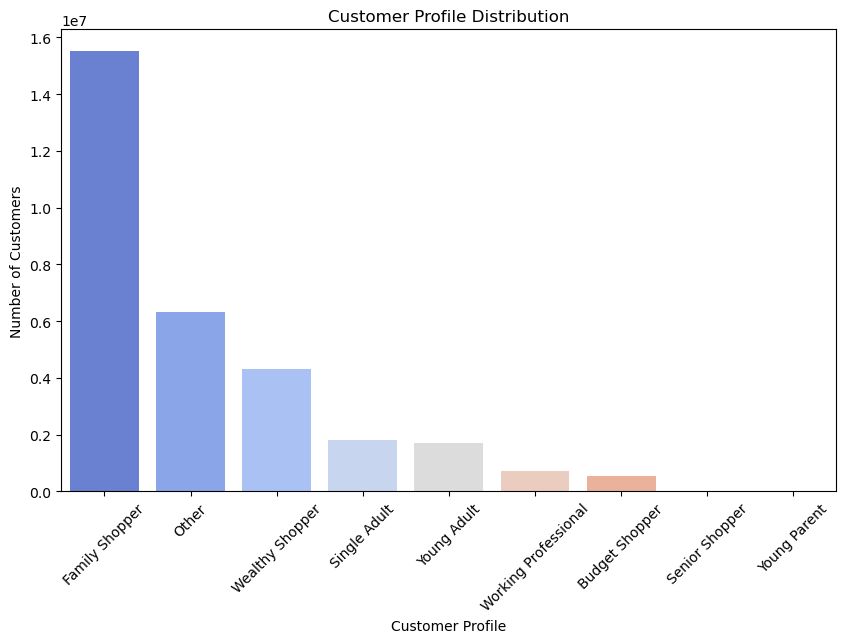

In [43]:
# Count the number of customers in each profile
profile_counts = df_active['customer_profile'].value_counts()

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='coolwarm')

# Format the chart
plt.title("Customer Profile Distribution")
plt.xlabel("Customer Profile")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Step 7: Aggregating Max, Min, and Mean Variavbles on Customer Profile Level

In [45]:
# Aggregate max, mean, and min values per customer profile
profile_aggregates = df_active.groupby('customer_profile').agg(
    max_usage_freq=('median_days_since_prior_order', 'max'),
    mean_usage_freq=('median_days_since_prior_order', 'mean'),
    min_usage_freq=('median_days_since_prior_order', 'min'),
    max_spending=('avg_order_spending', 'max'),
    mean_spending=('avg_order_spending', 'mean'),
    min_spending=('avg_order_spending', 'min')
).reset_index()

# Check results
print("Customer Profile Aggregates", profile_aggregates)

Customer Profile Aggregates        customer_profile  max_usage_freq  mean_usage_freq  min_usage_freq  \
0        Budget Shopper            30.0        10.580714             0.0   
1        Family Shopper            30.0         9.960988             0.0   
2                 Other            30.0         9.953100             0.0   
3        Senior Shopper            30.0        10.557444             0.0   
4          Single Adult            30.0        10.021226             0.0   
5       Wealthy Shopper            30.0         9.892366             0.0   
6  Working Professional            30.0         9.657752             0.0   
7           Young Adult            30.0         9.954323             0.0   
8          Young Parent            30.0         8.870765             1.0   

    max_spending  mean_spending  min_spending  
0     379.798437      74.087444      1.000000  
1   83381.566667     161.542801      1.000000  
2  100177.830769     114.899455      1.100000  
3   30857.492308   

### Step 8: Compare Customer Profiles Accross Regions and Departments

In [97]:
# Create crosstab of customer profiles by region
profile_region_crosstab = pd.crosstab(df_active['customer_profile'], df_active['Region'], normalize='columns') * 100

# Display results
print("Customer Profile Distribution by Region (%)", profile_region_crosstab)

Customer Profile Distribution by Region (%) Region                  Midwest  Northeast      South       West
customer_profile                                                
Budget Shopper         1.690405   1.734903   1.836451   1.687614
Family Shopper        49.538987  50.015582  50.329852  50.278893
Other                 20.756074  20.487183  20.041413  20.546201
Senior Shopper         0.115816   0.107508   0.109241   0.105270
Single Adult           5.970340   5.821488   5.980251   5.835180
Wealthy Shopper       14.113670  13.948142  13.752205  13.869541
Working Professional   2.377631   2.229278   2.256327   2.261636
Young Adult            5.392113   5.609363   5.657144   5.376357
Young Parent           0.044963   0.046553   0.037115   0.039308


In [99]:
# Create crosstab of customer profiles by department
profile_department_crosstab = pd.crosstab(df_active['customer_profile'], df['department_id'], normalize='columns') * 100

# Display results
print("Customer Profile Distribution by Department (%)", profile_department_crosstab)

Customer Profile Distribution by Department (%) department_id                1          2          3          4          5   \
customer_profile                                                              
Budget Shopper         1.599213   2.199878   1.453747   1.411027   2.113022   
Family Shopper        50.262451  49.335968  49.877680  50.063193  49.783927   
Other                 20.381754  20.278399  20.497703  20.690522  19.603532   
Senior Shopper         0.000000   0.000000   0.000000   0.000000   0.000000   
Single Adult           5.801348   6.216036   5.926422   5.912269   5.870965   
Wealthy Shopper       14.091843  14.062364  14.369288  14.177181  14.875507   
Working Professional   2.427358   2.252187   2.332561   2.244860   2.244394   
Young Adult            5.436033   5.655168   5.542599   5.500947   5.508653   
Young Parent           0.000000   0.000000   0.000000   0.000000   0.000000   

department_id                6          7          8          9          10  \
cus

In [105]:
# Create crosstab: Department purchases by region
department_region_crosstab = pd.crosstab(df['department_id'], df['Region'], normalize='columns') * 100

# Display results
print("Department Purchases by Region (%)", department_region_crosstab)

Department Purchases by Region (%) Region           Midwest  Northeast      South       West
department_id                                            
1               6.898428   6.830963   6.930207   6.895394
2               0.110828   0.115067   0.113159   0.109419
3               3.604808   3.645092   3.602846   3.631354
4              29.325282  29.109136  29.286367  29.241402
5               0.476299   0.463799   0.478359   0.474429
6               0.838927   0.819381   0.826010   0.837872
7               8.234135   8.447323   8.329777   8.202076
8               0.294248   0.325037   0.289745   0.307383
9               2.682115   2.652857   2.663520   2.696254
10              0.107841   0.101385   0.106867   0.109069
11              1.391924   1.377226   1.393176   1.358485
12              2.186678   2.177630   2.184530   2.199782
13              5.819167   5.756774   5.767630   5.804800
14              2.152745   2.159352   2.170622   2.190509
15              3.299872   3.263387  

In [112]:
# Get unique customer profiles
customer_profiles = df_active['customer_profile'].unique()

# Dictionary to store results
profile_department_region_dict = {}

# Loop through each profile and compute department purchases by region
for profile in customer_profiles:
    # Filter dataset for the current profile
    df_filtered = df_active[df_active['customer_profile'] == profile]
    
    # Create crosstab: Department purchases by region
    profile_department_region = pd.crosstab(df_filtered['department_id'], df_filtered['Region'], normalize='columns') * 100
    
    # Store result in dictionary
    profile_department_region_dict[profile] = profile_department_region

    # Print results with profile name correctly formatted
    print(f"\n Department Purchases for '{profile}' by Region (%):\n")
    print(profile_department_region)



 Department Purchases for 'Family Shopper' by Region (%):

Region           Midwest  Northeast      South       West
department_id                                            
1               6.900491   6.776833   6.895027   6.903567
2               0.110834   0.107310   0.111184   0.107559
3               3.590324   3.603037   3.584162   3.648222
4              29.348341  29.048212  29.459006  29.276728
5               0.459097   0.440181   0.484529   0.459390
6               0.822121   0.804700   0.818467   0.821282
7               8.298659   8.577693   8.285929   8.150016
8               0.273596   0.310187   0.292471   0.304713
9               2.674132   2.609292   2.638460   2.724826
10              0.118173   0.095676   0.106136   0.113003
11              1.387493   1.375863   1.379514   1.330299
12              2.178813   2.162159   2.183375   2.229583
13              5.801244   5.723853   5.728208   5.778451
14              2.154239   2.145914   2.151908   2.191698
15          

### Step 9: Visualise Results of Customer Profile Comparison

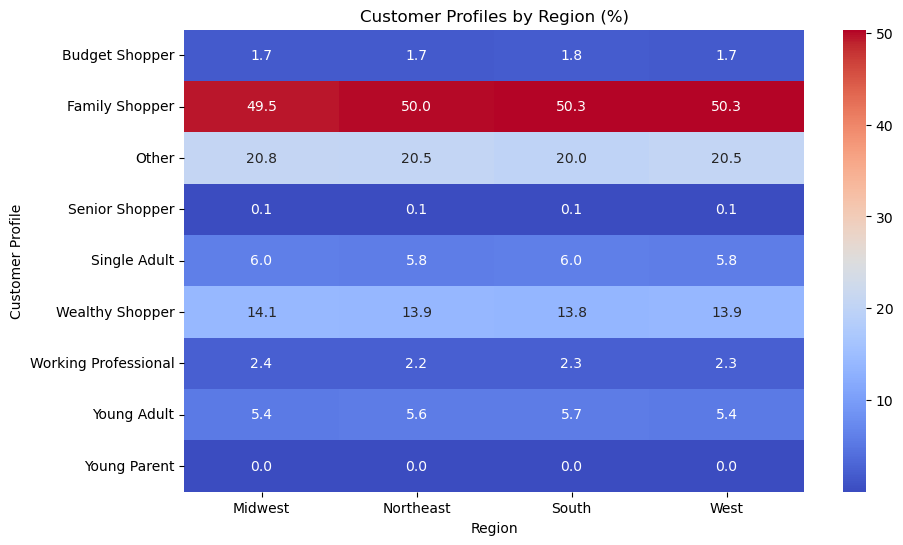

In [116]:
# Create customer x region heatmap
plt.figure(figsize=(10,6))
sns.heatmap(profile_region_crosstab, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Customer Profiles by Region (%)")
plt.xlabel("Region")
plt.ylabel("Customer Profile")

# Show the plot
plt.show()

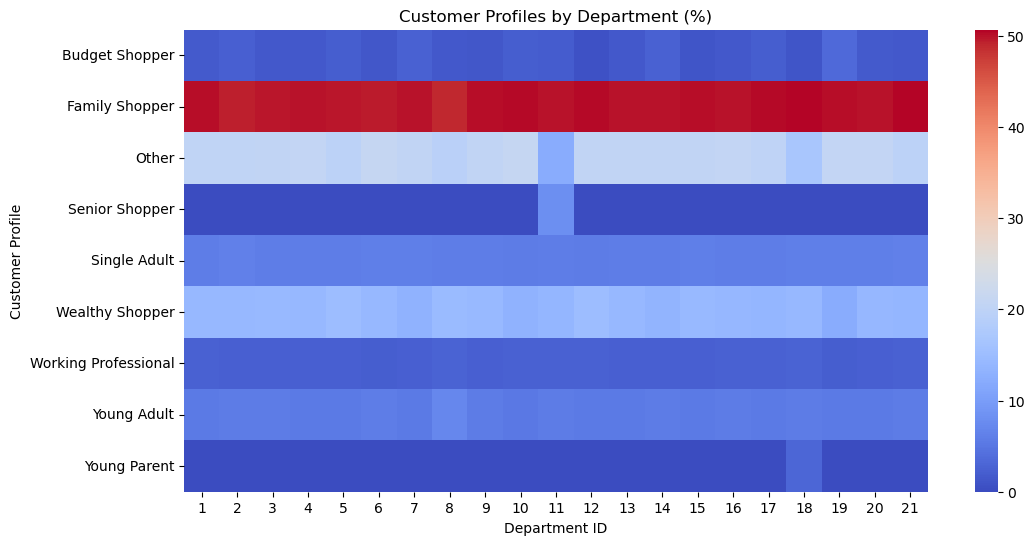

In [114]:
# Create profile x deparmtent heatmap
plt.figure(figsize=(12,6))
sns.heatmap(profile_department_crosstab, cmap='coolwarm', annot=False)
plt.title("Customer Profiles by Department (%)")
plt.xlabel("Department ID")
plt.ylabel("Customer Profile")

# Show the plot
plt.show()